# Employee Compensation and Satisfaction Insights dataset


# 1. Introduction
This notebook begins with a description of the tips data set obtained using summary statistics. There follows a section on regression to investigate if there is a relationship between the base salary and other columns resulting in difference in salaries across varius departments within an organization.. Finally, any interesting relationships between variables within the data set are teased out and investigated further. Findings from each part of the analysis are summarized in the accompanying README file.

Preliminaries

Load the various packages required to complete the work and set up the matplotlib plotting environment.

In [79]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import zscore
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR



#2. Description of the data set

Load the data set to a dataframe, take alook at the shape of our dataset and take a quick look at it by printing the first and last five lines.

In [80]:
# Loading dataset in df
df = pd.read_csv("/content/Employee Salaries.csv")

In [81]:
# Shape of your dataset
df.shape

(9958, 8)

In [82]:
# First 5 rows of our dataset
df.head()

,department,department_name,division,gender,base_salary,2020_overtime_pay,2020_longevity_pay,grade
0,ABS,Alcohol Beverage Services,Wholesale Administration,F,78902.0,199.17,0.00,18
1,ABS,Alcohol Beverage Services,Administrative Services,F,35926.0,0.00,4038.91,16
2,ABS,Alcohol Beverage Services,Administration,M,167345.0,0.00,0.00,M2
3,ABS,Alcohol Beverage Services,Wholesale Operations,F,90848.0,0.00,5717.68,21
4,ABS,Alcohol Beverage Services,Administration,F,78902.0,205.16,2460.24,18


In [83]:
df["division"].value_counts()

division
School Health Services                          361
Transit Gaithersburg Ride On                    343
Transit Silver Spring Ride On                   299
Office of Eligibility and Support Services      243
Highway Services                                228
                                               ... 
Division of Risk Management                       1
Operations and Administration - Controller        1
Fire Chief                                        1
Property and Supply Section                       1
Office of Zoning and Administrative Hearings      1
Name: count, Length: 605, dtype: int64

In [84]:
df.describe()

,base_salary,2020_overtime_pay,2020_longevity_pay
count,9958.000000,9958.000000,9958.000000
mean,78771.464060,5182.163123,923.572259
std,30153.168916,11062.665975,2043.593190
min,11147.240000,0.000000,0.000000
25%,56994.082500,0.000000,0.000000
50%,75290.000000,414.995000,0.000000
75%,94668.000000,5394.387500,0.000000
max,280000.000000,141998.220000,12471.840000


In [85]:
df[df['2020_longevity_pay'] > 10000]

,department,department_name,division,gender,base_salary,2020_overtime_pay,2020_longevity_pay,grade
3739,FRS,Fire and Rescue Services,Operations Division,M,168617.0,0.00,12471.84,B6
3763,FRS,Fire and Rescue Services,First Battalion - Administration,M,135203.0,0.00,10002.60,B3
3768,FRS,Fire and Rescue Services,Support Services Division,M,168617.0,0.00,12471.84,B6
3841,FRS,Fire and Rescue Services,Duty Operations Chief's Office,M,148712.0,0.00,10898.76,B4
3845,FRS,Fire and Rescue Services,First Battalion - Administration,M,135203.0,0.00,10002.62,B3
3846,FRS,Fire and Rescue Services,Special Operations,M,135203.0,0.00,10000.80,B3
3869,FRS,Fire and Rescue Services,Training,M,135203.0,0.00,10000.80,B3
3910,FRS,Fire and Rescue Services,Fourth Battalion - Administration,M,135203.0,0.00,10002.60,B3
3972,FRS,Fire and Rescue Services,Third Battalion - Administration,M,135203.0,0.00,10002.60,B3
3980,FRS,Fire and Rescue Services,Fire and Rescue Occupational Medical Services,M,135203.0,0.00,10000.80,B3


In [86]:
df.isnull().sum()

department            0
department_name       0
division              0
gender                0
base_salary           0
2020_overtime_pay     0
2020_longevity_pay    0
grade                 0
dtype: int64

#1) Univariate Analysis

I) Categorical Data

A) Bar plot

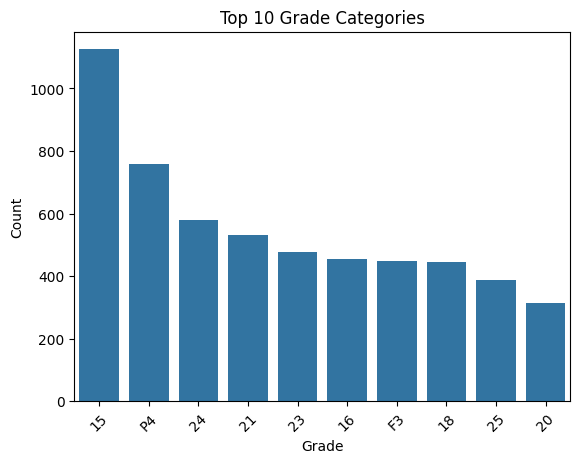

In [87]:
# Visualization of top 10 Grade Category distribution

top_n = 10
top_grade_categories = df['grade'].value_counts().head(top_n)

sns.barplot(x=top_grade_categories.index, y=top_grade_categories.values)
plt.title(f'Top {top_n} Grade Categories')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

B) Bar chart

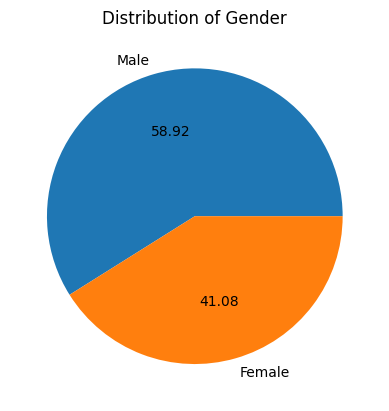

In [88]:
# Distribution of gender in percentage

gender_counts = df['gender'].value_counts()
gender_labels = {'M': 'Male', 'F': 'Female'}
gender_counts.index = gender_counts.index.map(gender_labels)


gender_counts.plot(kind='pie', autopct='%.2f')
plt.title('Distribution of Gender')
plt.ylabel('')
plt.show()

C) Bar chart for top 15 Departments by Count

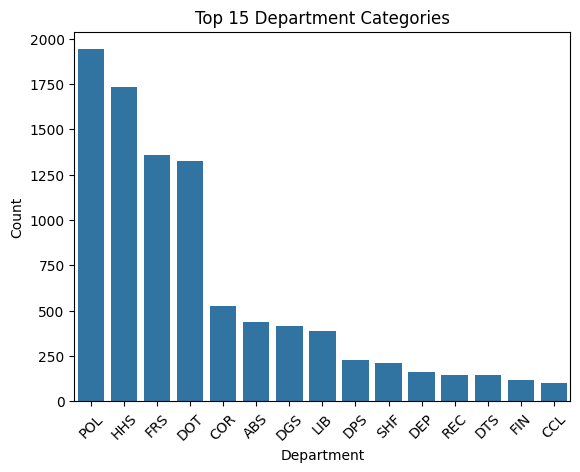

In [89]:
# Top 15 Departments by Count
top_n = 15
top_department_categories = df['department'].value_counts().head(top_n)

sns.barplot(x=top_department_categories.index, y=top_department_categories.values)
plt.title(f'Top {top_n} Department Categories')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

D) Top 10 Departments Distribution

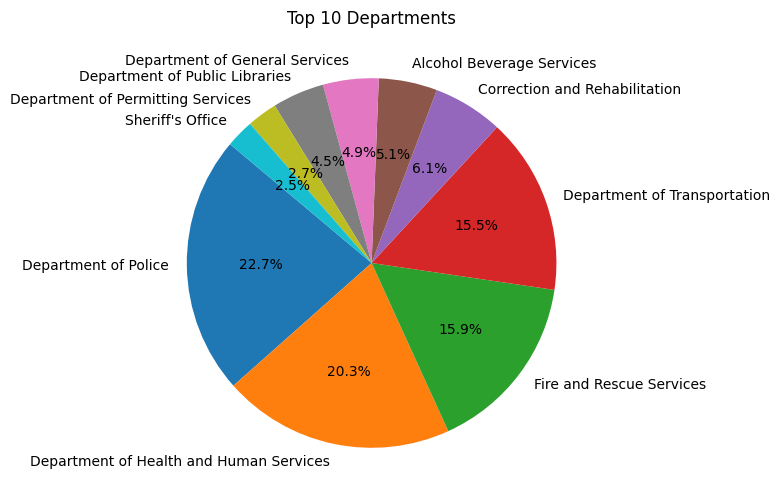

In [90]:
top_n = 10
top_department_counts = df['department_name'].value_counts().head(top_n)

# Plotting the pie chart for the top 10 departments
plt.figure(figsize=(10, 6))
plt.pie(top_department_counts, labels=top_department_counts.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Top {top_n} Departments')
plt.show()

E) Top 10 Divisions Distribution

<ipython-input-91-95d71d2d8bb9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_division_counts.index, y=top_division_counts.values, palette='viridis')


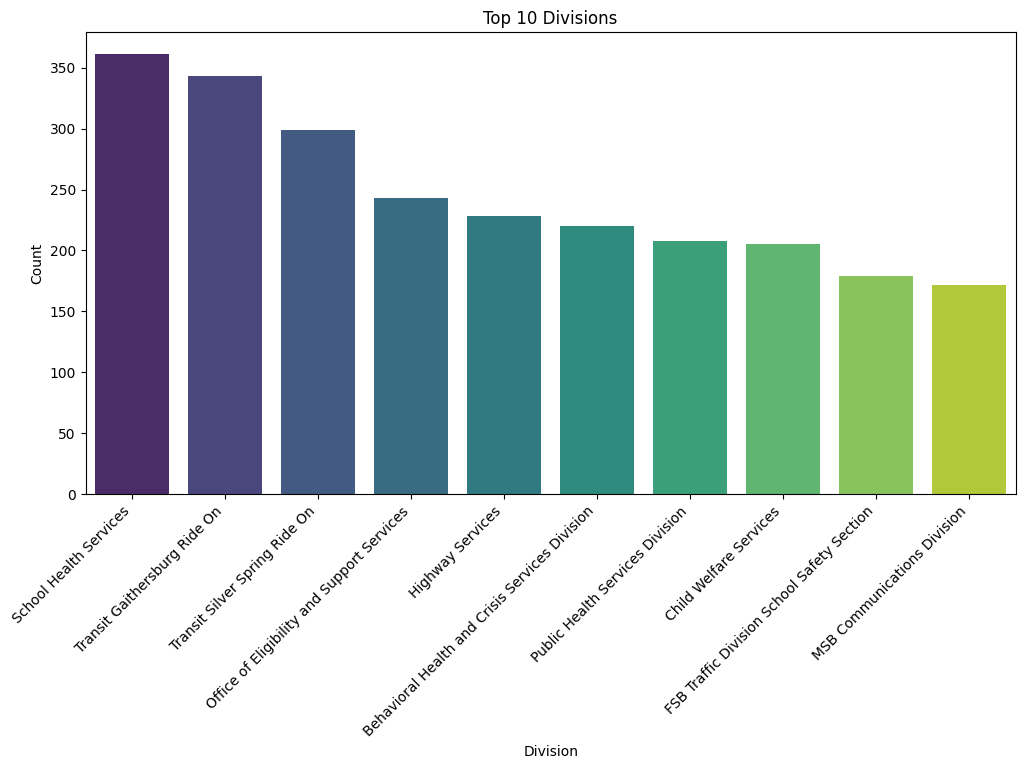

In [91]:
top_n = 10
top_division_counts = df['division'].value_counts().head(top_n)

# Plotting the bar chart for the top 10 divisions
plt.figure(figsize=(12, 6))
sns.barplot(x=top_division_counts.index, y=top_division_counts.values, palette='viridis')
plt.title(f'Top {top_n} Divisions')
plt.xlabel('Division')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

II) Numerical Data

A) Distribution of Base Salary

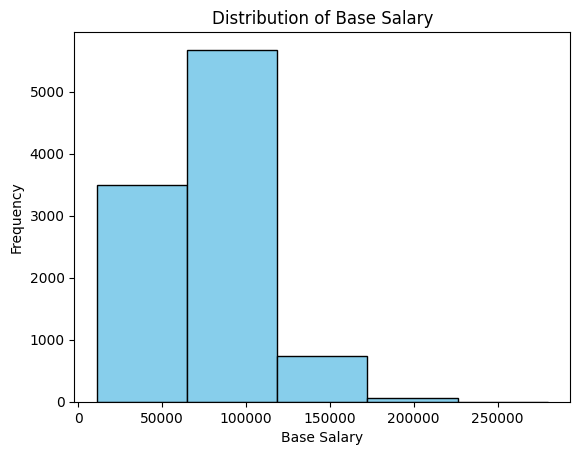

In [92]:
plt.hist(df['base_salary'], bins=5, color='skyblue', edgecolor='black')
plt.title('Distribution of Base Salary')
plt.xlabel('Base Salary')
plt.ylabel('Frequency')
plt.show()

B) Distribution of Overtime Pay in 2020

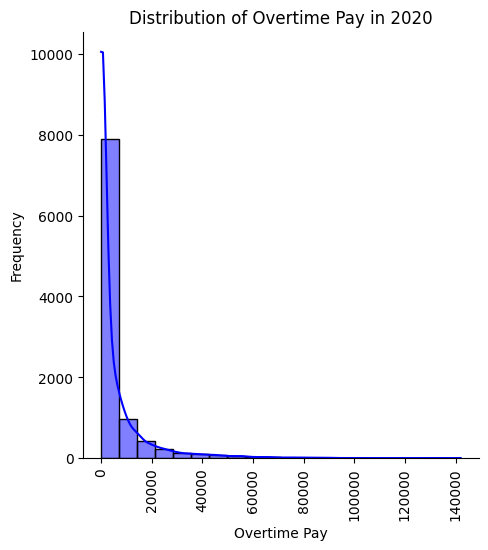

In [93]:
sns.displot(df['2020_overtime_pay'], kde=True, bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Overtime Pay in 2020')
plt.xlabel('Overtime Pay')
plt.ylabel('Frequency')

# Rotate x-axis labels to be in vertical order
plt.xticks(rotation=90)

plt.show()

C) Distribution of 2020 Longevity Pay

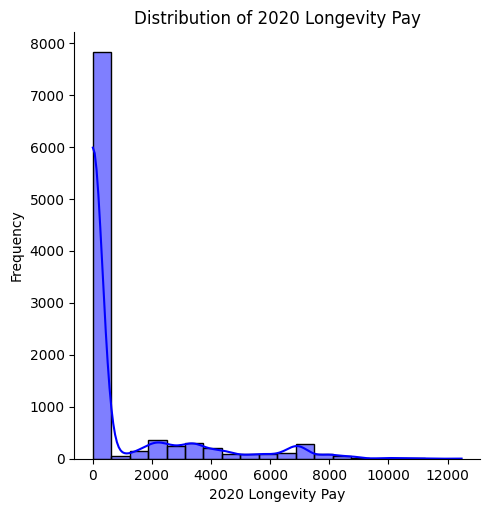

In [94]:
sns.displot(df['2020_longevity_pay'], kde=True, bins=20, color='blue', edgecolor='black')
plt.title('Distribution of 2020 Longevity Pay')
plt.xlabel('2020 Longevity Pay')
plt.ylabel('Frequency')
plt.show()

# 2) Bivariate Analysis

A) Top 10 Departments: Average Base Salary

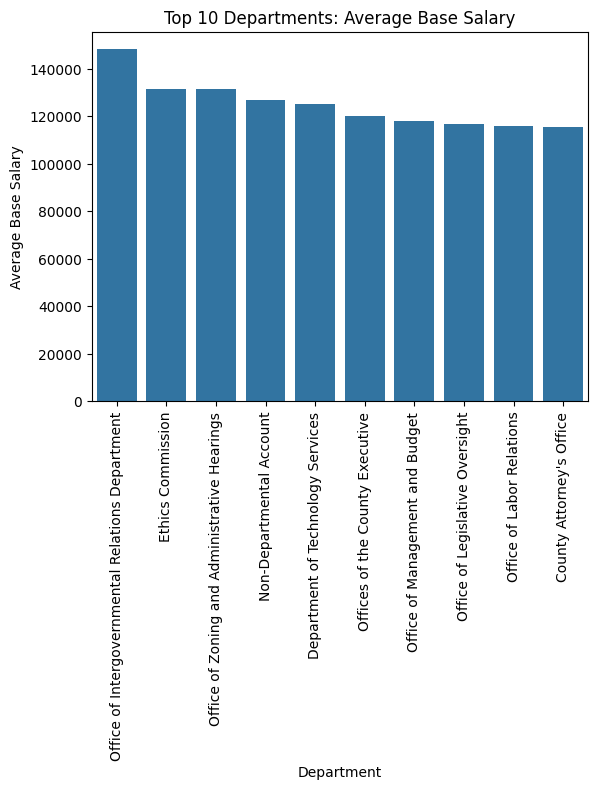

In [95]:
top_n_departments = 10

# Calculate the average base salary for each department
avg_salary_by_department = df.groupby('department_name')['base_salary'].mean().sort_values(ascending=False).head(top_n_departments).reset_index()

# Create the bar plot with rotated x-axis labels
sns.barplot(x='department_name', y='base_salary', data=avg_salary_by_department)
plt.xticks(rotation=90)  # Rotate x-axis labels to be in vertical order

plt.title(f'Top {top_n_departments} Departments: Average Base Salary')
plt.xlabel('Department')
plt.ylabel('Average Base Salary')
plt.show()

B) Top 5 Divisions: 2020 Overtime Pay Distribution

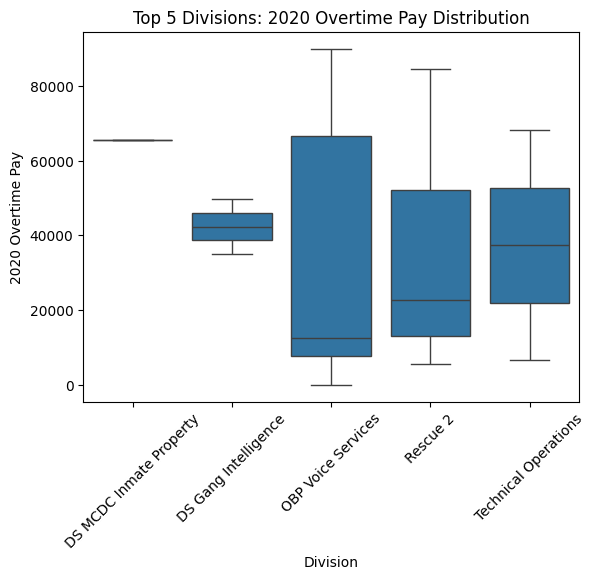

In [96]:
top_n_divisions = 5

# Calculate the average overtime pay for each division
avg_overtime_by_division = df.groupby('division')['2020_overtime_pay'].mean().sort_values(ascending=False).head(top_n_divisions).reset_index()

# Filter the data for the top 5 divisions
df_top_divisions = df[df['division'].isin(avg_overtime_by_division['division'])]

# Create the box plot
sns.boxplot(x='division', y='2020_overtime_pay', data=df_top_divisions)

plt.title(f'Top {top_n_divisions} Divisions: 2020 Overtime Pay Distribution')
plt.xlabel('Division')
plt.ylabel('2020 Overtime Pay')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

C) Distribution of Base Salary by Gender

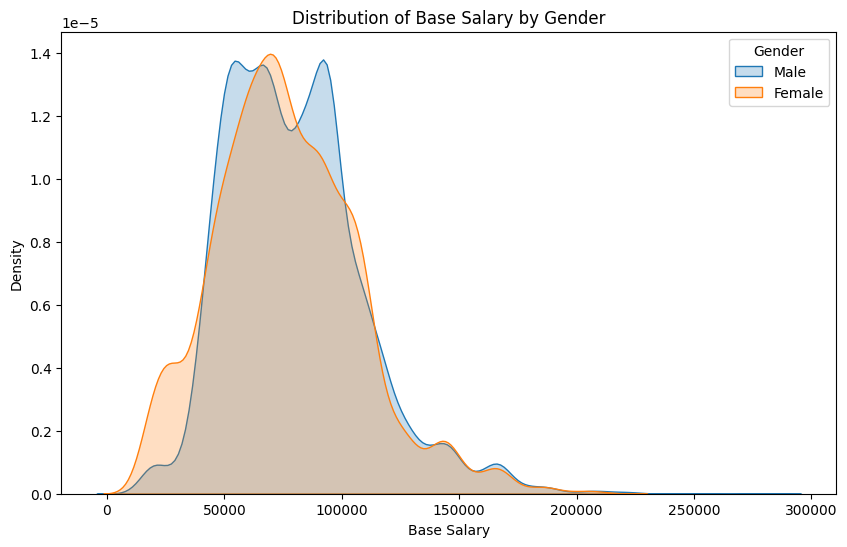

In [97]:
plt.figure(figsize=(10, 6))

# Create kernel density plots for 'base_salary' with 'gender' as the categorical variable
sns.kdeplot(df[df['gender']=='M']['base_salary'], label='Male', fill=True)
sns.kdeplot(df[df['gender']=='F']['base_salary'], label='Female', fill=True)

plt.title('Distribution of Base Salary by Gender')
plt.xlabel('Base Salary')
plt.ylabel('Density')
plt.legend(title='Gender')
plt.show()

D) Top 10 Divisions vs Gender Relationship

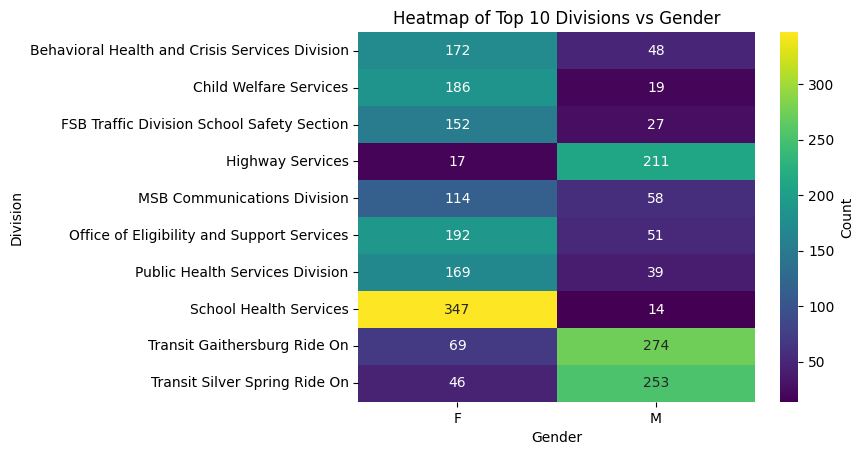

In [98]:
top_n_divisions = 10

# Get the top 10 divisions
top_divisions = df['division'].value_counts().head(top_n_divisions).index

# Filter the data for the top divisions
df_top = df[df['division'].isin(top_divisions)]

# Create a heatmap for the relationship between 'division' and 'gender'
heatmap_data = pd.crosstab(df_top['division'], df_top['gender'])
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='viridis', cbar_kws={'label': 'Count'})

plt.title('Heatmap of Top 10 Divisions vs Gender')
plt.xlabel('Gender')
plt.ylabel('Division')
plt.show()

E) Clustermap of Top 10 Grades vs Gender Relationship

<Figure size 1200x800 with 0 Axes>

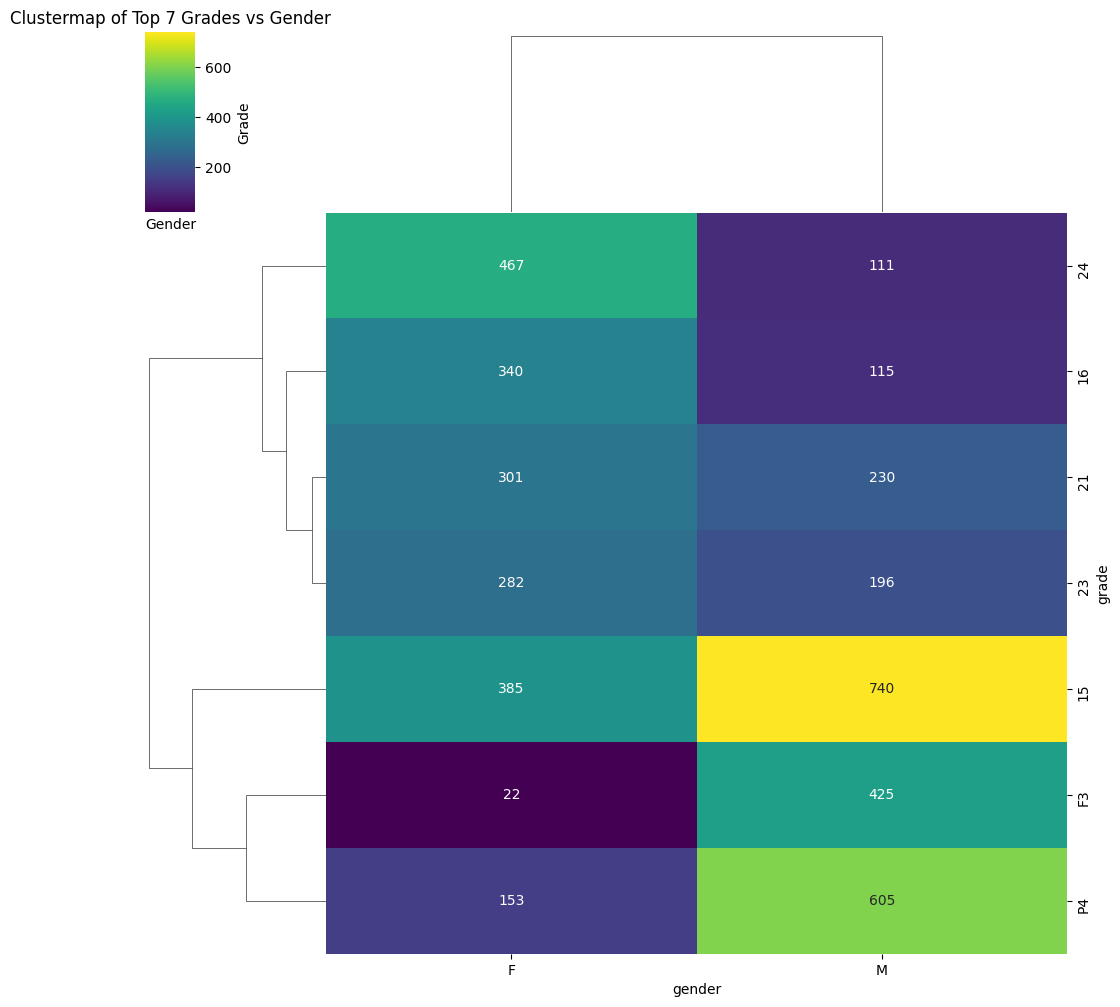

In [99]:
top_n_grades = 7

# Get the top 10 grades
top_grades = df['grade'].value_counts().head(top_n_grades).index

# Filter the data for the top grades
df_top = df[df['grade'].isin(top_grades)]

plt.figure(figsize=(12, 8))

# Create a clustermap for the relationship between 'grade' and 'gender'
clustermap_data = pd.crosstab(df_top['grade'], df_top['gender'])
sns.clustermap(clustermap_data, annot=True, fmt='d', cmap='viridis', cbar_kws={'label': 'Count'})

plt.title(f'Clustermap of Top {top_n_grades} Grades vs Gender')
plt.xlabel('Gender')
plt.ylabel('Grade')
plt.show()

# 3) Data cleaning and Pre-processing for evaluation

In [100]:
df.sample(5)

,department,department_name,division,gender,base_salary,2020_overtime_pay,2020_longevity_pay,grade
623,CCL,County Council,Council Members and Staff,F,87837.86,0.00,0.0,26
569,CCL,County Council,Council Central Staff,F,126584.00,0.00,0.0,28
3856,FRS,Fire and Rescue Services,Station 8,M,83154.00,49.98,0.0,F3
3854,FRS,Fire and Rescue Services,Station 6,M,74998.00,504.81,0.0,F3
173,ABS,Alcohol Beverage Services,Silver Spring,F,36534.43,147.68,0.0,12


In [101]:
# Select numeric columns for outlier detection
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate z-scores for each numeric column
z_scores = zscore(df[numeric_columns])

# Define a z-score threshold for outlier detection (e.g., 3)
threshold = 3

# Create a DataFrame of boolean values indicating whether each value is an outlier
outliers_df = pd.DataFrame(abs(z_scores) > threshold, columns=numeric_columns)

# Sum the number of outliers for each row
outliers_df['total_outliers'] = outliers_df.sum(axis=1)

# Display rows with outliers
rows_with_outliers = df[outliers_df['total_outliers'] > 0]

# Print information about outliers
if not rows_with_outliers.empty:
    print("Rows with outliers:")
    print(rows_with_outliers)
else:
    print("No outliers found.")

print("Rows and columns with outliers:")
print(outliers_df[outliers_df.any(axis=1)])


Rows with outliers:
     department                               department_name  \
345         ABS                     Alcohol Beverage Services   
441         BOE                            Board of Elections   
444         BOE                            Board of Elections   
450         BOE                            Board of Elections   
466         BOE                            Board of Elections   
...         ...                                           ...   
9587        PRO                         Office of Procurement   
9616        REC                      Department of Recreation   
9743        SHF                              Sheriff's Office   
9948        ZAH  Office of Zoning and Administrative Hearings   
9950        ZAH  Office of Zoning and Administrative Hearings   

                             division gender  base_salary  2020_overtime_pay  \
345                          Director      M    220000.00               0.00   
441                          Director  

In [102]:
# To treat the outliers, I will use a winsorizing approach, which involves capping extreme values at a specified percentile.

# Select numeric columns for outlier detection
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate z-scores for each numeric column
z_scores = zscore(df[numeric_columns])

# Define a z-score threshold for outlier detection (e.g., 3)
threshold = 3

# Create a DataFrame of boolean values indicating whether each value is an outlier
outliers_df = pd.DataFrame(abs(z_scores) > threshold, columns=numeric_columns)

# Treat outliers using winsorizing (capping at the 1st and 99th percentiles)
lower_percentile = 1
upper_percentile = 99
df[numeric_columns] = df[numeric_columns].apply(
    lambda x: x.clip(lower=x.quantile(lower_percentile/100), upper=x.quantile(upper_percentile/100))
)

# Display rows with treated outliers
rows_with_treated_outliers = df[outliers_df.any(axis=1)]

# Print information about treated outliers
if not rows_with_treated_outliers.empty:
    print("Rows with treated outliers:")
    print(rows_with_treated_outliers)
else:
    print("No treated outliers found.")


Rows with treated outliers:
     department                               department_name  \
345         ABS                     Alcohol Beverage Services   
441         BOE                            Board of Elections   
444         BOE                            Board of Elections   
450         BOE                            Board of Elections   
466         BOE                            Board of Elections   
...         ...                                           ...   
9587        PRO                         Office of Procurement   
9616        REC                      Department of Recreation   
9743        SHF                              Sheriff's Office   
9948        ZAH  Office of Zoning and Administrative Hearings   
9950        ZAH  Office of Zoning and Administrative Hearings   

                             division gender  base_salary  2020_overtime_pay  \
345                          Director      M    167345.00               0.00   
441                          Di

#4) Model Training

In [103]:
# Split the dataset into features (X) and target variable (y)
X = df.drop('base_salary', axis=1)
y = df['base_salary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical columns in X
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

# Linear Regression
linear_reg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
linear_reg_pipeline.fit(X_train, y_train)
linear_reg_predictions = linear_reg_pipeline.predict(X_test)
linear_reg_mse = mean_squared_error(y_test, linear_reg_predictions)
print("Linear Regression MSE:", linear_reg_mse)

# Random Forest Regression
rf_reg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])
rf_reg_pipeline.fit(X_train, y_train)
rf_reg_predictions = rf_reg_pipeline.predict(X_test)
rf_reg_mse = mean_squared_error(y_test, rf_reg_predictions)
print("Random Forest Regressor MSE:", rf_reg_mse)

# Support Vector Regression (SVR)
svm_reg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', SVR())
])
svm_reg_pipeline.fit(X_train, y_train)
svm_reg_predictions = svm_reg_pipeline.predict(X_test)
svm_reg_mse = mean_squared_error(y_test, svm_reg_predictions)
print("Support Vector Regressor MSE:", svm_reg_mse)



Linear Regression MSE: 119964323.87210944
Random Forest Regressor MSE: 103493008.62949595
Support Vector Regressor MSE: 870348939.9204555


# 5) Model Evaluation

In [104]:
# Discretize the predicted values into bins
# Define the number of bins and their boundaries
num_bins = 5
bins = np.linspace(min(y_test), max(y_test), num_bins + 1)

# Convert predicted values into bins
linear_reg_bins = np.digitize(linear_reg_predictions, bins)
rf_reg_bins = np.digitize(rf_reg_predictions, bins)
svm_reg_bins = np.digitize(svm_reg_predictions, bins)

# Convert true values into bins
y_test_bins = np.digitize(y_test, bins)

from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score for Linear Regression
linear_reg_precision = precision_score(y_test_bins, linear_reg_bins, average='weighted')
linear_reg_recall = recall_score(y_test_bins, linear_reg_bins, average='weighted')
linear_reg_f1 = f1_score(y_test_bins, linear_reg_bins, average='weighted')

print("Linear Regression Precision:", linear_reg_precision)
print("Linear Regression Recall:", linear_reg_recall)
print("Linear Regression F1-score:", linear_reg_f1)

# Calculate precision, recall, and F1-score for Random Forest Regression
rf_reg_precision = precision_score(y_test_bins, rf_reg_bins, average='weighted')
rf_reg_recall = recall_score(y_test_bins, rf_reg_bins, average='weighted')
rf_reg_f1 = f1_score(y_test_bins, rf_reg_bins, average='weighted')

print("Random Forest Regression Precision:", rf_reg_precision)
print("Random Forest Regression Recall:", rf_reg_recall)
print("Random Forest Regression F1-score:", rf_reg_f1)

# Calculate precision, recall, and F1-score for Support Vector Regression (SVR)
svm_reg_precision = precision_score(y_test_bins, svm_reg_bins, average='weighted')
svm_reg_recall = recall_score(y_test_bins, svm_reg_bins, average='weighted')
svm_reg_f1 = f1_score(y_test_bins, svm_reg_bins, average='weighted')

print("Support Vector Regression Precision:", svm_reg_precision)
print("Support Vector Regression Recall:", svm_reg_recall)
print("Support Vector Regression F1-score:", svm_reg_f1)


Linear Regression Precision: 0.6881580214764156
Linear Regression Recall: 0.6721887550200804
Linear Regression F1-score: 0.6630212503196764
Random Forest Regression Precision: 0.7518122153348358
Random Forest Regression Recall: 0.7444779116465864
Random Forest Regression F1-score: 0.7446982386077603
Support Vector Regression Precision: 0.1368851409654683
Support Vector Regression Recall: 0.36997991967871485
Support Vector Regression F1-score: 0.19983525159634508


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [105]:
from sklearn.metrics import r2_score

# Calculate R^2 score for Linear Regression
linear_reg_r2 = r2_score(y_test, linear_reg_predictions)
print("Linear Regression R^2 Score:", linear_reg_r2)

# Calculate R^2 score for Random Forest Regression
rf_reg_r2 = r2_score(y_test, rf_reg_predictions)
print("Random Forest Regression R^2 Score:", rf_reg_r2)

# Calculate R^2 score for Support Vector Regression (SVR)
svm_reg_r2 = r2_score(y_test, svm_reg_predictions)
print("Support Vector Regression R^2 Score:", svm_reg_r2)

Linear Regression R^2 Score: 0.8617245949297156
Random Forest Regression R^2 Score: 0.880710054220436
Support Vector Regression R^2 Score: -0.0031970200431667983
